✅ Model loaded successfully.
📤 Please upload an image of an animal (any size, RGB)...


Saving 2.jpg to 2.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


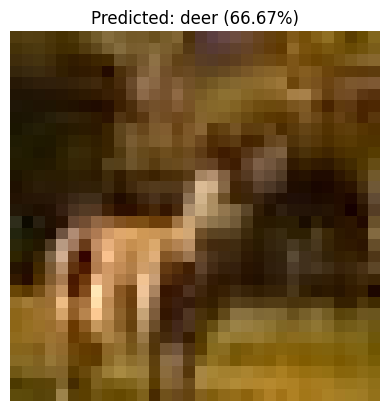

In [2]:
# Setup
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model
from PIL import Image
import io
from google.colab import files
import urllib.request
import os

# Class Labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Loading Model
model_url = "https://github.com/shaswat373/Animal-Classifier/raw/main/animal_classifier.h5"
model_path = "animal_classifier.h5"

if not os.path.exists(model_path):
    print("Downloading model from GitHub...")
    urllib.request.urlretrieve(model_url, model_path)
    print("Model downloaded.")

model = load_model(model_path, compile=False)
print("✅ Model loaded successfully.")

# Image Upload
print("📤 Please upload an image of an animal (any size, RGB)...")
uploaded = files.upload()

for filename in uploaded:
    # Load and resize image
    image = Image.open(io.BytesIO(uploaded[filename])).convert('RGB')
    resized = image.resize((32, 32))
    img_array = np.array(resized).astype('float32') / 255.0
    img_array = img_array.reshape(1, 32, 32, 3)

    # Predict
    pred_probs = model.predict(img_array)[0]
    predicted_class = np.argmax(pred_probs)
    predicted_label = class_names[predicted_class]
    confidence = pred_probs[predicted_class] * 100

    # === DISPLAY ===
    plt.imshow(image)
    plt.title(f"Predicted: {predicted_label} ({confidence:.2f}%)")
    plt.axis('off')
    plt.show()
